# Project 2 - Classification
## Credit card default
### This notebook uses the dateset *default_credit_card_clients.xlsx*

(c) Nuno António 2022 - Rev. 1.0

## Dataset description

- **X1**: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- **X2**: Gender (1 = male; 2 = female). 
- **X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- **X4**: Marital status (1 = married; 2 = single; 3 = others). 
- **X5**: Age (year). 
- **X6** - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- **X12-X17**: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- **X18-X23**: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.
- **Y**: Indication if the customer defaulted in the following month (0-no, 1-yes).

For additional information on the dataset check https://www.sciencedirect.com/science/article/abs/pii/S0957417407006719

## Work description

### Overview
<p>You should organize into groups of 3 to 5 students, where you will assume the role of a consultant. You are asked to develop a model to predict which customers are likely to default on their credit card in the following month. The bank wants to use the model the decrease operational losses.</p>
<p>Employing the CRISP-DM process model, you are expected to define, describe and explain the model built. Simultaneous, you should explain how your model can help the bank reaching its objectives.</p>

### Questions or additional informations
For any additional questions, don't hesitate to get in touch with the instructor. The instructor will also act as the bank business/project stakeholder.

## Initializations and data loading

In [1]:
"""
Dataset = default_credit_card_clients.xlsx

## Dataset description

- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6-X11: History of past payment. 
    We tracked the past monthly payment records (from April to September, 2005) as follows: 
        X6 = the repayment status in September, 2005; 
        X7 = the repayment status in August, 2005;
        X8= the repayment status in July, 2005;
        X9= the repayment status in June, 2005;
        X10= the repayment status in May, 2005;
        X11 = the repayment status in April, 2005. 
        The measurement scale for the repayment status is: 
           -1 = pay duly; 
            1 = payment delay for one month; 
            2 = payment delay for two months;
            3 = payment delay for three months;
            4 = payment delay for four months;
            5 = payment delay for five months;
            6 = payment delay for six months;
            7 = payment delay for seven months;
            8 = payment delay for eight months; 
            9 = payment delay for nine months and above. 

- X12-X17: Amount of bill statement (NT dollar). 
    X12 = amount of bill statement in September, 2005; 
    X13 = amount of bill statement in August, 2005;
    X14 = amount of bill statement in July, 2005;
    X15 = amount of bill statement in June, 2005;
    X16 = amount of bill statement in May, 2005; 
    X17 = amount of bill statement in April, 2005. 

- X18-X23: Amount of previous payment (NT dollar). 
    X18 = amount paid in September, 2005; 
    X19 = amount paid in August, 2005;
    X20 = amount paid in July, 2005;
    X21 = amount paid in June, 2005;
    X22 = amount paid in May, 2005;
    X23 = amount paid in April, 2005.

- Y: Indication if the customer defaulted in the following month (0-no, 1-yes).

For additional information on the dataset check https://www.sciencedirect.com/science/article/abs/pii/S0957417407006719

1-Develop a model to predict which customers are likely to default on their credit card in the following month. The bank wants to use the model the decrease operational losses.
2-Employing the CRISP-DM process model, you are expected to define, describe and explain the model built. Simultaneous, you should explain how your model can help the bank reaching its objectives.

"""


'\nDataset = default_credit_card_clients.xlsx\n\n## Dataset description\n\n- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. \n- X2: Gender (1 = male; 2 = female). \n- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). \n- X4: Marital status (1 = married; 2 = single; 3 = others). \n- X5: Age (year). \n- X6-X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. \n- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2

In [16]:
# Loading packages
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl as op



In [43]:
# Loading the dataset and visualizing summary statistics
# Path: 4-MLF_Machine Learning for Finance\Project 2\default_credit_card_clients.xlsx
df = pd.read_excel('default_credit_card_clients.xlsx', engine='openpyxl')
df.head(20)


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [68]:
#concatenating name columns with 1st row
df.columns = df.iloc[0]
ds = df.iloc[1:]
ds.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [69]:
ds.describe(include='all').T

,count,unique,top,freq
0,,,,
ID,30000,30000,1,1
LIMIT_BAL,30000,81,50000,3365
SEX,30000,2,2,18112
EDUCATION,30000,7,2,14030
MARRIAGE,30000,4,2,15964
AGE,30000,56,29,1605
PAY_0,30000,11,0,14737
PAY_2,30000,11,0,15730
PAY_3,30000,11,0,15764


In [70]:
#CRISP-DM process model
#1. Business Understanding
#2. Data Understanding
#3. Data Preparation
#4. Modeling
#5. Evaluation
#6. Deployment

In [71]:

print(ds['default payment next month'].value_counts())
print(ds['default payment next month'].value_counts(normalize=True))



0    23364
1     6636
Name: default payment next month, dtype: int64
0    0.7788
1    0.2212
Name: default payment next month, dtype: float64


In [105]:
#1. Business Understanding
#The bank wants to use the model the decrease operational losses.

#2. Data Understanding
#The dataset contains 30,000 observations and 25 variables. 
#The dataset is unbalanced with Y 23,364 observations of non-defaulters and 6,636 observations of defaulters.´
#The dataset contains 23 numerical variables and 2 categorical variables.
#numerical variables: X1 = Amount of the given credit (NT dollar), X5 = Age (year), X12-X17 = Amount of bill statement (NT dollar), X18-X23 = Amount of previous payment (NT dollar)
#categorical variables: X2 = Sex, X3 = Education, X4 = Marital status

def to_categorical(df, cols):
    for col in cols:
        df[col] = df[col].astype('category')
    return df

ds = to_categorical(ds, ['SEX', 'EDUCATION', 'MARRIAGE', 'default payment next month'])
ds.describe(include='all').T
ds.dtypes

#removing ID column
ds = ds.drop(['ID'], axis=1)


0
LIMIT_BAL                        int64
SEX                           category
EDUCATION                     category
MARRIAGE                      category
AGE                              int64
PAY_0                          float64
PAY_2                          float64
PAY_3                          float64
PAY_4                          float64
PAY_5                          float64
PAY_6                          float64
BILL_AMT1                      float64
BILL_AMT2                      float64
BILL_AMT3                      float64
BILL_AMT4                      float64
BILL_AMT5                      float64
BILL_AMT6                      float64
PAY_AMT1                       float64
PAY_AMT2                       float64
PAY_AMT3                       float64
PAY_AMT4                       float64
PAY_AMT5                       float64
PAY_AMT6                       float64
default payment next month    category
dtype: object

In [106]:
#count 0 values in each column
ds.isin([0]).sum(axis=0)

0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [107]:
#the data is not clean, there are 0 values in the columns
# must be replaced with NaN values to be able to drop them
ds = ds.replace(0, np.nan)
ds.isin([0]).sum(axis=0)


0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [108]:
#drop rows with NaN values
#ds = ds.dropna()
#ds.isin([0]).sum(axis=0)


In [109]:
ds.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
0,,,,,,,,,,,
LIMIT_BAL,30000.0,NaN,NaN,NaN,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,2.0,2.0,18112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EDUCATION,29986.0,6.0,2.0,14030.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MARRIAGE,29946.0,3.0,2.0,15964.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,30000.0,NaN,NaN,NaN,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,15263.0,NaN,NaN,NaN,-0.032824,1.575400,-2.0,-1.00,-1.0,1.00,8.0
PAY_2,14270.0,NaN,NaN,NaN,-0.281219,1.723888,-2.0,-2.00,-1.0,2.00,8.0
PAY_3,14236.0,NaN,NaN,NaN,-0.350239,1.718833,-2.0,-2.00,-1.0,2.00,8.0
PAY_4,13545.0,NaN,NaN,NaN,-0.488741,1.701918,-2.0,-2.00,-1.0,2.00,8.0


In [110]:
ds['SEX'].value_counts()


2    18112
1    11888
Name: SEX, dtype: int64

In [111]:
ds['EDUCATION'].value_counts()


2    14030
1    10585
3     4917
5      280
4      123
6       51
Name: EDUCATION, dtype: int64

In [112]:
ds['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
Name: MARRIAGE, dtype: int64

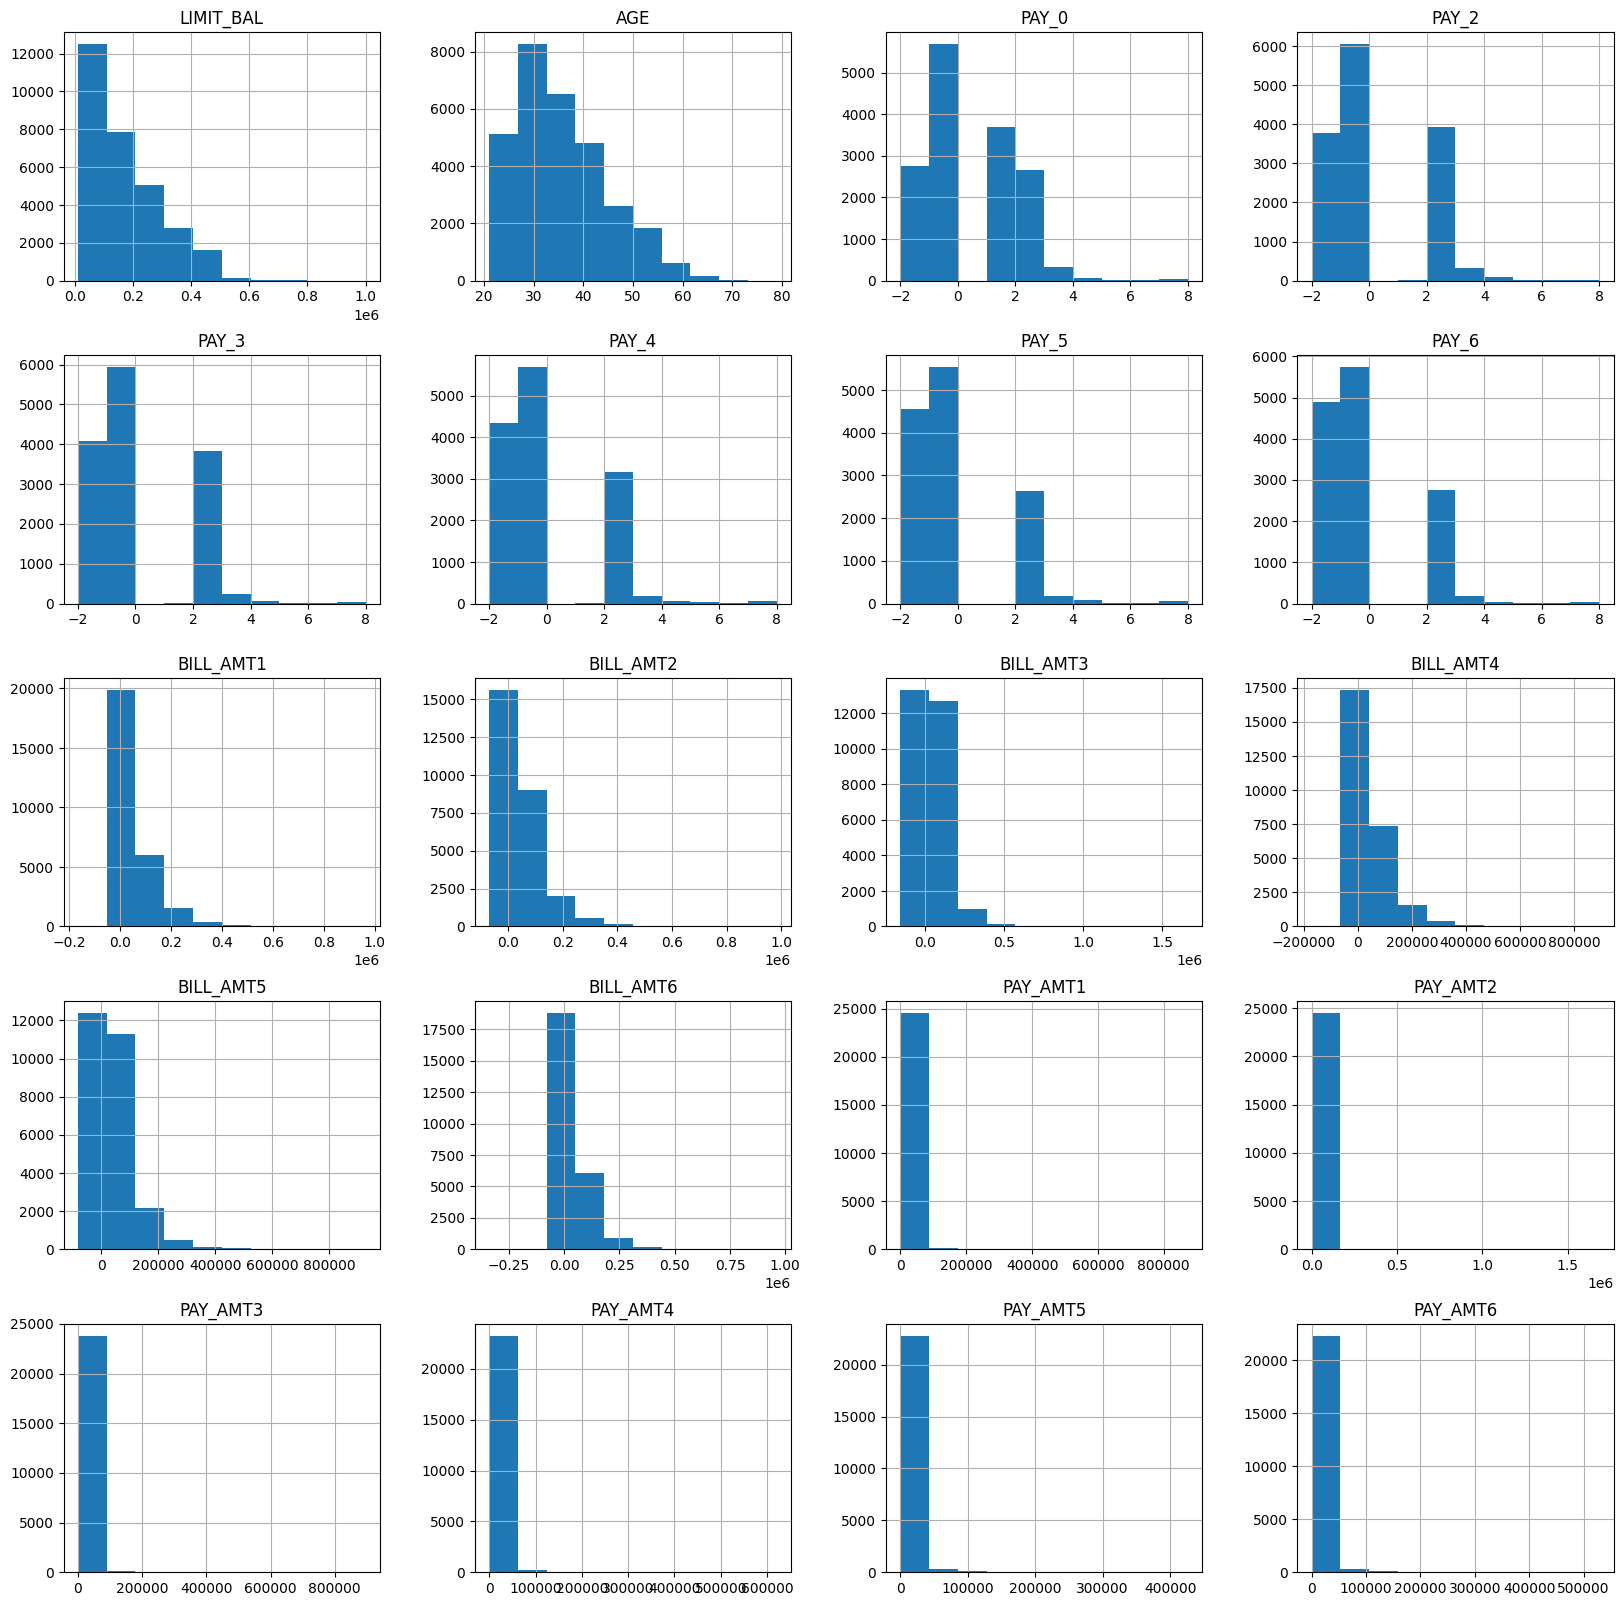

In [113]:
# Do histograms select just  numeric variables

numerical=ds.select_dtypes(include=[np.number]).columns.tolist()

ds[numerical].hist(figsize=(20,20))
plt.show()


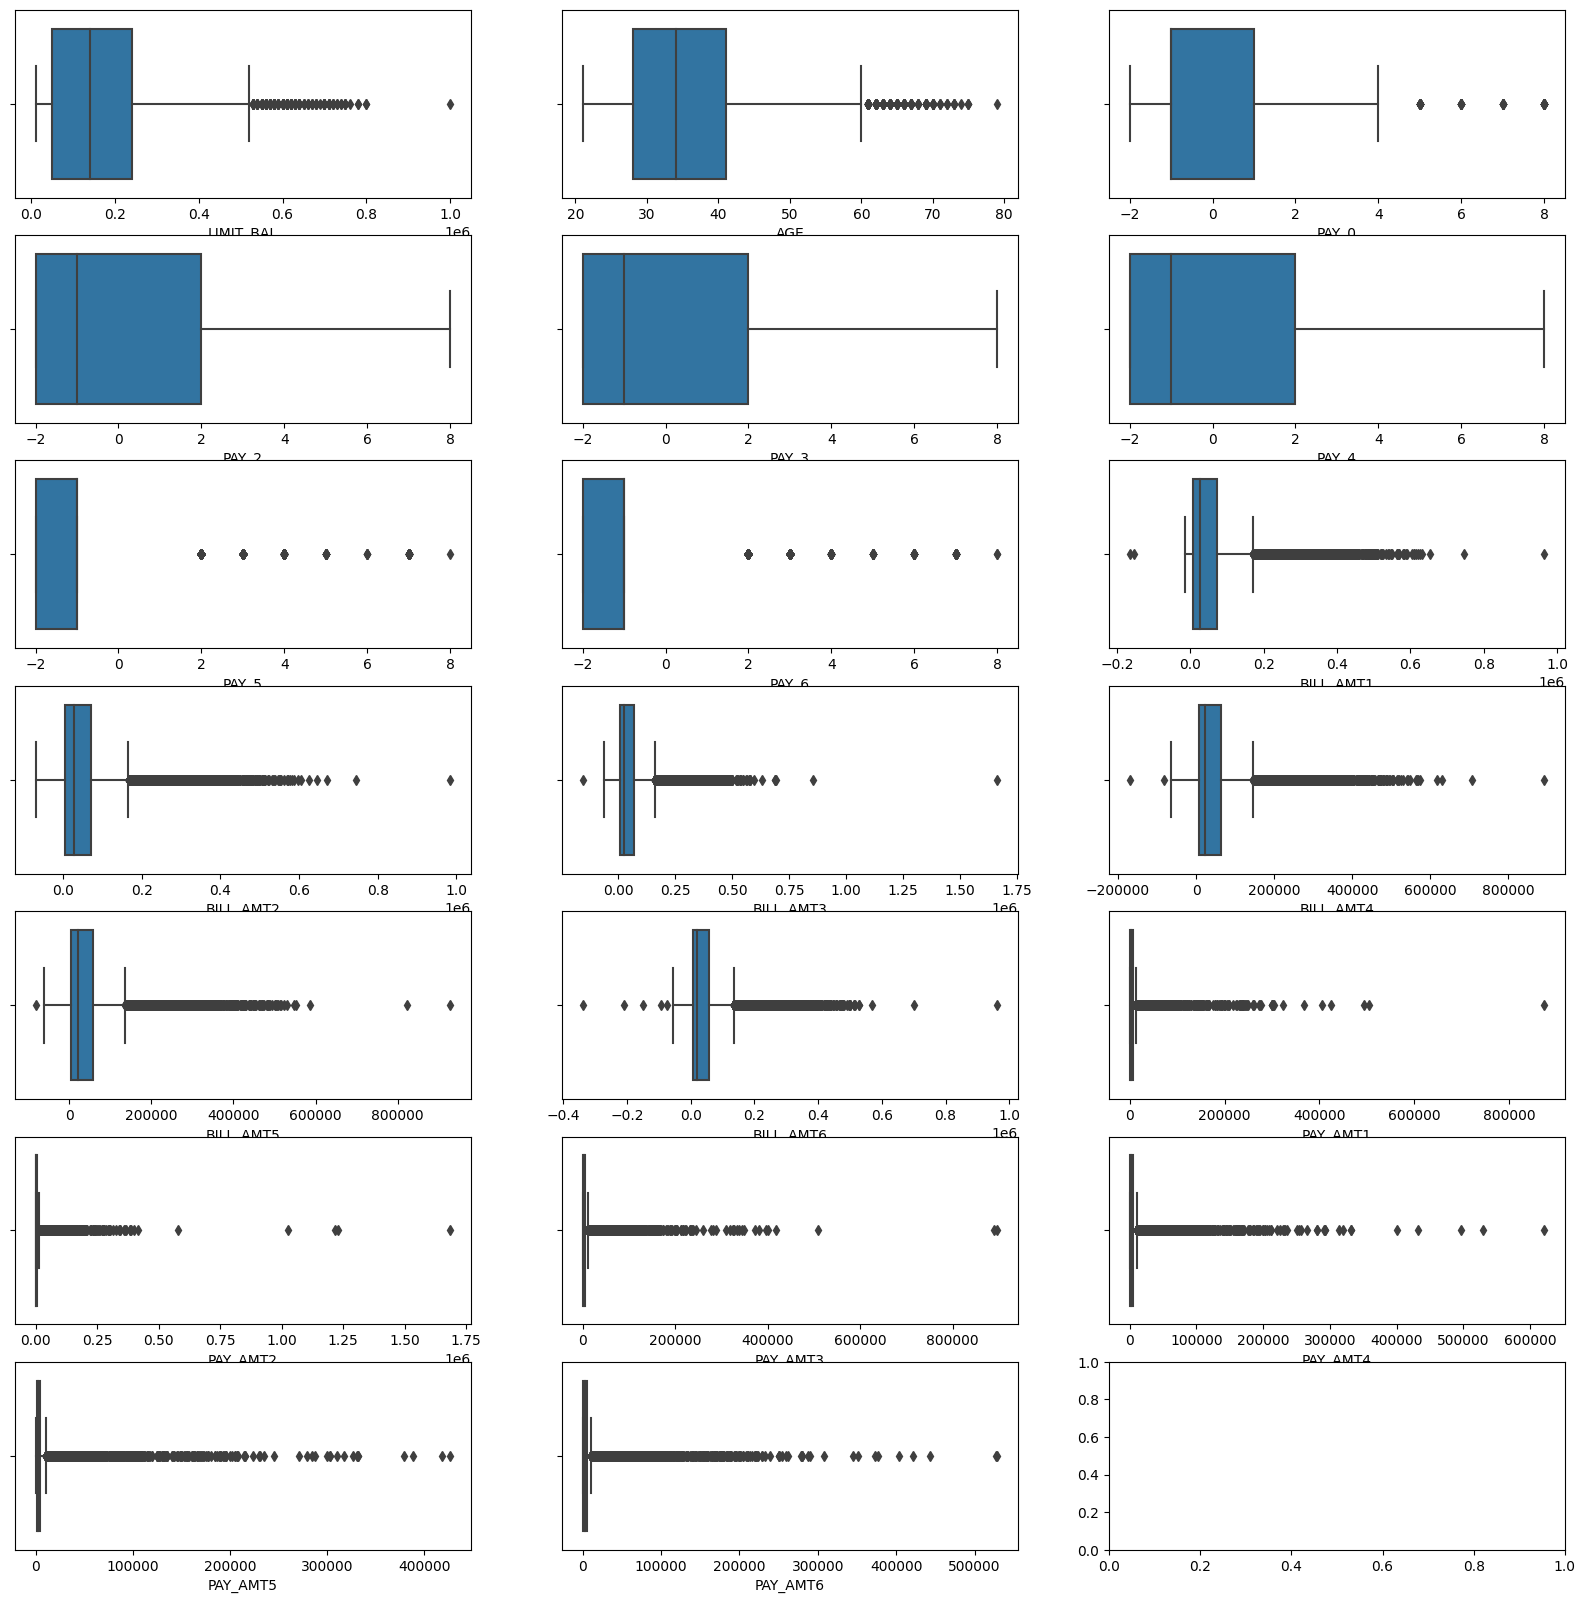

In [116]:
# Do boxplots select just  numeric variables
fig, ax = plt.subplots(7, 3, figsize=(20, 20))
for var, subplot in zip(ds[numerical], ax.flatten()):
    sns.boxplot(x=ds[var], ax=subplot)


In [114]:
#3. Data Preparation
#3.1. Data Cleaning

#3.1.1. Missing values
